In [1]:
import pandas as pd

# Find ALEdb samples that have 1) ygfZ variants and 2) iModulon samples

In [2]:
raw_all_aledb_mut_df = pd.read_pickle('../all_aledb_raw_mut_df.pkl')
ygfZ_muts = raw_all_aledb_mut_df[raw_all_aledb_mut_df['Gene'] == 'ygfZ'].copy().reset_index(drop=True)

# AFI values are best as strings for matching against iModDB md.
ygfZ_muts.ale = ygfZ_muts.ale.astype(str)
ygfZ_muts.flask = ygfZ_muts.flask.astype(str)
ygfZ_muts.isolate = ygfZ_muts.isolate.astype(str)

display(ygfZ_muts.head(), set(ygfZ_muts.exp))

,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,Gene,Reference Seq,ALEdb source
0,TOL_propanediol,8,50,2,1,1.0,3041565,SNP,A→G,I85V (ATT→GTT),ygfZ,NC_000913,public
1,ROS_eAMP,1,112,0,1,1.0,3041398,SNP,T→G,L29R (CTT→CGT),ygfZ,NC_000913,public
2,ROS_eAMP,1,112,1,1,1.0,3041398,SNP,T→G,L29R (CTT→CGT),ygfZ,NC_000913,public
3,ROS_eAMP,1,17,0,1,1.0,3041398,SNP,T→G,L29R (CTT→CGT),ygfZ,NC_000913,public
4,ROS_eAMP,1,17,1,1,1.0,3041398,SNP,T→G,L29R (CTT→CGT),ygfZ,NC_000913,public


{'ROS_eAMP',
 'TOL_propanediol',
 'unpublished_ALE_experiment_1',
 'unpublished_ALE_experiment_11',
 'unpublished_ALE_experiment_121',
 'unpublished_ALE_experiment_151',
 'unpublished_ALE_experiment_155',
 'unpublished_ALE_experiment_178',
 'unpublished_ALE_experiment_197',
 'unpublished_ALE_experiment_244',
 'unpublished_ALE_experiment_275',
 'unpublished_ALE_experiment_283',
 'unpublished_ALE_experiment_357',
 'unpublished_ALE_experiment_434',
 'unpublished_ALE_experiment_92'}

In [3]:
imoddb_ale_md_df = pd.read_pickle('../data/imodulondb/imoddb_ale_md_df.pkl')
imoddb_ale_md_df.head()

,sample,study,project,condition,rep_id,Strain Description,Strain,Culture Type,Evolved Sample,Base Media,...,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,afir,ALE exp,ale,flask,isolate
p1k_00125,glu__glu_ale3__1,Glucose Evolution,glu,glu_ale3,1,Escherichia coli GLU.3.412.1,MG1655,Batch,Endpoint,M9,...,,,,,,3.412.1,GLU,3,412,1
p1k_00126,glu__glu_ale4__1,Glucose Evolution,glu,glu_ale4,1,Escherichia coli GLU.4.403.1,MG1655,Batch,Endpoint,M9,...,,,,,,4.403.1,GLU,4,403,1
p1k_00127,glu__glu_ale5__1,Glucose Evolution,glu,glu_ale5,1,Escherichia coli GLU.5.288.1,MG1655,Batch,Endpoint,M9,...,,,,,,5.288.1,GLU,5,288,1
p1k_00128,glu__glu_ale6__1,Glucose Evolution,glu,glu_ale6,1,Escherichia coli GLU.6.406.1,MG1655,Batch,Endpoint,M9,...,,,,,,6.406.1,GLU,6,406,1
p1k_00129,glu__glu_ale8__1,Glucose Evolution,glu,glu_ale8,1,Escherichia coli GLU.8.380.1,MG1655,Batch,Endpoint,M9,...,,,,,,8.380.1,GLU,8,380,1


In [4]:
ygfZ_muts['iModDB samples'] = ''
for imoddb_sample_id, r in imoddb_ale_md_df.iterrows():
    df = pd.DataFrame()
    if r.isolate == '':
        df = ygfZ_muts[(ygfZ_muts.exp == r['ALE exp']) & (ygfZ_muts['ale'] == r.ale) & (ygfZ_muts['flask'] == r.flask)]
    else:
        df = ygfZ_muts[(ygfZ_muts.exp == r['ALE exp']) & (ygfZ_muts['ale'] == r.ale) & (ygfZ_muts['flask'] == r.flask) & (ygfZ_muts['isolate'] == r.isolate)]
    if len(df) > 0:
        for i, r2 in df.iterrows():
            if ygfZ_muts.at[i, 'iModDB samples'] == '':
                ygfZ_muts.at[i, 'iModDB samples'] = set()
            ygfZ_muts.at[i, 'iModDB samples'].add(imoddb_sample_id)
imoddb_ygfZ_muts = ygfZ_muts[ygfZ_muts['iModDB samples'] != ''].copy()
imoddb_ygfZ_muts['AA sub'] = imoddb_ygfZ_muts.Details.apply(lambda s: s.split(' ')[0])
imoddb_ygfZ_muts.to_pickle('imoddb_ygfZ_mut_df.pkl')
display(len(imoddb_ygfZ_muts), imoddb_ygfZ_muts.head())

31

,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,Gene,Reference Seq,ALEdb source,iModDB samples,AA sub
1,ROS_eAMP,1,112,0,1,1.0,3041398,SNP,T→G,L29R (CTT→CGT),ygfZ,NC_000913,public,"{p1k_00512, p1k_00515, p1k_00513, p1k_00511, p...",L29R
2,ROS_eAMP,1,112,1,1,1.0,3041398,SNP,T→G,L29R (CTT→CGT),ygfZ,NC_000913,public,"{p1k_00512, p1k_00515, p1k_00513, p1k_00511, p...",L29R
11,ROS_eAMP,11,83,0,1,1.0,3041632,SNP,T→A,V107E (GTG→GAG),ygfZ,NC_000913,public,"{p1k_00542, p1k_00543, p1k_00544, p1k_00545, p...",V107E
12,ROS_eAMP,11,83,1,1,1.0,3041632,SNP,T→A,V107E (GTG→GAG),ygfZ,NC_000913,public,"{p1k_00542, p1k_00543, p1k_00544, p1k_00545, p...",V107E
17,ROS_eAMP,13,87,0,1,1.0,3041632,SNP,T→A,V107E (GTG→GAG),ygfZ,NC_000913,public,"{p1k_00546, p1k_00549, p1k_00547, p1k_00548, p...",V107E


# Find ygfZ mutation characterization samples that have iModulon samples

In [5]:
# ygfZ_mut_char_exp_md_df = pd.read_csv('./30 samples (18 samples Melatonin inhibition re-extract + 12 samples ygfZ mutant).csv', index_col=0)
# ygfZ_mut_char_exp_md_df = ygfZ_mut_char_exp_md_df[ygfZ_mut_char_exp_md_df.B.str.contains('SDT_ygfZ')].copy()
# ygfZ_mut_char_exp_md_df.set_index('B', inplace=True)

# def _get_description(d):
#     s = ''
#     if 'HMP3427' in d['D']:
#         s += 'base strain '
#     if 'SDT495' in d['D']:
#         s += 'ygfZ mutant '
#     if d['E'] == 'control':
#         s += 'in control media'
#     if d['E'] == '5 mM H2O2':
#         s += 'in 5 mM H2O2 media'
#     return s

# ygfZ_mut_char_exp_md_df['Description'] = ygfZ_mut_char_exp_md_df.apply(lambda r: _get_description(r), axis=1)
# ygfZ_mut_char_exp_md_df

# Annotate specific ygfZ mutations to iModulonDB ygfZ Imodulon sample activities

In [6]:
from pymodulon.io import *

ica = load_json_model('../data/imods/precise1k_with_ygfZ_muts.json.gz')
all_imoddb_md_df = pd.read_csv('../data/imodulondb/sample_table.csv', index_col=0)
display(len(all_imoddb_md_df), all_imoddb_md_df.head())

1035

,sample,study,project,condition,rep_id,Strain Description,Strain,Culture Type,Evolved Sample,Base Media,...,creator,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates,passed_number_replicates,run_date,n_replicates
p1k_00001,control__wt_glc__1,Control,control,wt_glc,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,...,Sangwoo Seo,True,True,True,True,control:wt_glc,True,True,4/17/13,2.0
p1k_00002,control__wt_glc__2,Control,control,wt_glc,2,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,...,Sangwoo Seo,True,True,True,True,control:wt_glc,True,True,4/17/13,2.0
p1k_00003,fur__wt_dpd__1,Fur,fur,wt_dpd,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,...,Sangwoo Seo,True,True,True,True,fur:wt_dpd,True,True,10/2/13,2.0
p1k_00004,fur__wt_dpd__2,Fur,fur,wt_dpd,2,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,...,Sangwoo Seo,True,True,True,True,fur:wt_dpd,True,True,10/2/13,2.0
p1k_00005,fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,...,Sangwoo Seo,True,True,True,True,fur:wt_fe,True,True,9/5/13,2.0


## ALE

In [7]:
CP4_44_imod_act_df = ica.A.loc[['CP4-44']].T
CP4_44_imod_act_df['ygfZ mutation'] = ''
for _, r in imoddb_ygfZ_muts.iterrows():
    for imoddb_sample_id in r['iModDB samples']:
        CP4_44_imod_act_df.at[imoddb_sample_id, 'ygfZ mutation'] = r['AA sub']
CP4_44_imod_act_df['ygfZ mutation'] = CP4_44_imod_act_df['ygfZ mutation'].apply(lambda s: 'none' if s == '' else s)

CP4_44_imod_act_df['Strain Description'] = CP4_44_imod_act_df.apply(lambda r: all_imoddb_md_df.at[r.name, 'Strain Description'] if r.name in all_imoddb_md_df.index else '',axis=1)
CP4_44_imod_act_df['Supplement'] = CP4_44_imod_act_df.apply(lambda r: all_imoddb_md_df.at[r.name, 'Supplement'] if r.name in all_imoddb_md_df.index else '',axis=1)
CP4_44_imod_act_df['project'] = CP4_44_imod_act_df.apply(lambda r: all_imoddb_md_df.at[r.name, 'project'] if r.name in all_imoddb_md_df.index else '',axis=1)
CP4_44_imod_act_df.fillna('', inplace=True)

CP4_44_imod_act_df['Strain Description'] = CP4_44_imod_act_df.apply(lambda r: 'ygfZ mutant' if 'SDT_ygfZ' in r.name else r['Strain Description'], axis=1)
CP4_44_imod_act_df['Supplement'] = CP4_44_imod_act_df.apply(lambda r: 'H202?' if 'SDT_ygfZ' in r.name else r['Supplement'], axis=1)
CP4_44_imod_act_df['project'] = CP4_44_imod_act_df.apply(lambda r: 'general ROS tolerance?' if 'SDT_ygfZ' in r.name else r['project'], axis=1)

CP4_44_imod_act_df

,CP4-44,ygfZ mutation,Strain Description,Supplement,project
p1k_00001,0.116495,none,Escherichia coli K-12 MG1655,,control
p1k_00002,-0.116495,none,Escherichia coli K-12 MG1655,,control
p1k_00003,4.096606,none,Escherichia coli K-12 MG1655,DPD (0.2mM),fur
p1k_00004,3.695490,none,Escherichia coli K-12 MG1655,DPD (0.2mM),fur
p1k_00005,4.678113,none,Escherichia coli K-12 MG1655,FeCl2 (0.1mM),fur
...,...,...,...,...,...
SDT_ygfZ5,-0.365331,none,ygfZ mutant,H202?,general ROS tolerance?
SDT_ygfZ6,-0.856856,none,ygfZ mutant,H202?,general ROS tolerance?
SDT_ygfZ7,5.065904,none,ygfZ mutant,H202?,general ROS tolerance?
SDT_ygfZ8,4.208705,none,ygfZ mutant,H202?,general ROS tolerance?


In [8]:
# get all sample names (indexes) that have "p1k" in their name
p1k_sample_names = set()
for sample_name in CP4_44_imod_act_df.index:
    if 'p1k' in sample_name:
        p1k_sample_names.add(sample_name)
len(p1k_sample_names)

1035

In [9]:
# get all sample names (indexes) that don't have "p1k" in their name
non_p1k_sample_names = set()
for sample_name in CP4_44_imod_act_df.index:
    if 'p1k' not in sample_name:
        non_p1k_sample_names.add(sample_name)
len(non_p1k_sample_names)

12

## ygfZ mutant characterization experiment

In [10]:
all_imod_act_df = ica.A.T
ygfZ_mut_char_imod_act_df = all_imod_act_df[all_imod_act_df.index.str.contains('SDT_ygfZ')].copy()
ygfZ_mut_char_imod_act_df.head()

,Sugar Diacid,Translation,ygdT,OxyR,FlhDC-2,Osmoprotectant,Glutamine,Sialic Acid,yqhI,ROS TALE Amp,...,Tryptophanase,crp KO-2,cyoB/ndh/nuoB KO-2,tpiA KO,Phage Shock,Glyoxylate,CCK-PGI Del,Acetate,Ile/Val,UC-8
SDT_ygfZ1,1.134723,-6.661858,-1.314641,-2.867832,16.424758,2.696900,-4.247850,-1.416022,-2.718542,1.223023,...,-1.462049,0.898121,3.201018,2.633406,2.184471,-1.214364,1.496831,-1.109687,0.807011,3.585676
SDT_ygfZ10,0.310591,-13.733916,-2.154409,-0.427685,-4.802475,6.551607,-3.747412,-1.726745,-2.303336,0.808456,...,-1.781017,-0.674763,-0.566356,1.132954,6.994449,0.235150,3.316719,-1.563335,0.291543,4.180927
SDT_ygfZ11,0.091126,-12.013262,-1.491418,-0.764410,-5.065787,7.151730,-4.201414,-1.800666,-2.957082,1.023151,...,-1.410657,-0.541186,0.390815,-0.139769,6.301814,0.035004,3.111708,-0.785191,-0.266215,3.654245
SDT_ygfZ12,0.357876,-10.571279,-2.362113,-1.799025,-2.925569,1.935490,-1.117923,-1.249075,-2.370855,0.415727,...,-0.642922,-0.623306,3.786058,1.417916,5.041807,2.042141,2.466283,-1.952823,0.505158,1.058525
SDT_ygfZ2,1.181588,-7.314172,-0.799226,-2.707896,17.630771,2.943540,-4.216452,-1.337519,-2.816115,0.442772,...,-1.853651,0.091826,2.042564,2.928691,2.193572,-2.146122,1.518010,-1.443825,0.594498,3.023355


# Get all iModulonDB samples for projects that have ygfZ mutations
We want to compare CP4-44 iModulons activities between samples that have and don't have ygfZ mutations.

In [11]:
import re

proj_w_ygfZ_vars = set(CP4_44_imod_act_df[CP4_44_imod_act_df['ygfZ mutation'] != 'none'].project)
ygfZ_proj_imod_act_df = CP4_44_imod_act_df[CP4_44_imod_act_df.project.isin(proj_w_ygfZ_vars)].copy()
ygfZ_proj_imod_act_df['Supplement'] = ygfZ_proj_imod_act_df['Supplement'].apply(lambda s: 'none' if s == '' else s)  # Better for plots

def _update_strain_description(sample_d):
    sd = sample_d['Strain Description']
    # sd = sd.replace('Escherichia coli', 'E. coli')
    sd = sd.replace('Escherichia coli', '')
    sd = sd.replace('K-12 MG1655', '')
    sd = sd.replace('OxyR.', 'FeSO4 ALE ')
    sd = sd.replace('ERS.', 'paraquat ALE ')

    # Remove the ALE numbers
    if sample_d['ygfZ mutation'] != 'none':
        if 'paraquat ALE' in sd:
            m = re.search(r"\d", sd)
            sd = sd[:m.start()-1]
        if 'FeSO4 ALE' in sd:
            sd = sd[:-6]  # currently hardcoded shortcut

    if sample_d['ygfZ mutation'] == 'none':
        if sample_d['project'] == 'oxyR':
            sd = 'WT FeSO4 ALE'
        if sample_d['project'] == 'ros_tale':
            sd = 'WT paraquat ALE'

    return sd
    

ygfZ_proj_imod_act_df['Strain Description'] = ygfZ_proj_imod_act_df.apply(lambda r: _update_strain_description(r), axis=1)

ygfZ_proj_imod_act_df['strain'] = ygfZ_proj_imod_act_df.apply(
    lambda r: r['ygfZ mutation'] + r['Strain Description'] if r['ygfZ mutation'] != 'none' else r['Strain Description'],
    axis=1
    )
display(set(ygfZ_proj_imod_act_df.strain))

{'L29R paraquat ALE',
 'T108P paraquat ALE',
 'V107E paraquat ALE',
 'W27C paraquat ALE',
 'WT paraquat ALE'}

# Combine ALE experiment and ygfZ mutant characterization experiment data

In [12]:
ygfZ_mut_char_exp_md_df = pd.read_csv('./30 samples (18 samples Melatonin inhibition re-extract + 12 samples ygfZ mutant).csv', index_col=0)
ygfZ_mut_char_exp_md_df.drop(columns='F', inplace=True)
ygfZ_mut_char_exp_md_df = ygfZ_mut_char_exp_md_df[ygfZ_mut_char_exp_md_df.B.str.contains('SDT_ygfZ')].copy()
ygfZ_mut_char_exp_md_df.set_index('B', inplace=True)

def _get_description(d):
    s = ''
    if 'HMP3427' in d['D']:
        s += 'parent melatonin production strain'
    if 'SDT495' in d['D']:
        s += 'T108P melatonin production strain'
    # if d['E'] == 'control':
    #     s += 'in control media'
    # if d['E'] == '5 mM H2O2':
    #     s += 'in 5 mM H2O2 media'
    return s

ygfZ_mut_char_exp_md_df.rename(columns={'E': 'Supplement'}, inplace=True)
ygfZ_mut_char_exp_md_df['Supplement'] = ygfZ_mut_char_exp_md_df['Supplement'].apply(lambda s: 'none' if s == 'control' else s)

# TODO: change this to return values for both the "Description" col and the column that will be used for the "strain" col
ygfZ_mut_char_exp_md_df['Description'] = ygfZ_mut_char_exp_md_df.apply(lambda r: _get_description(r), axis=1)
ygfZ_mut_char_exp_md_df

,C,D,Supplement,Plate label,Position,on the Comment,Description
B,,,,,,,
SDT_ygfZ1,FC_RNAseq_2023_2_1,HMP3427-1-1,none,Plate4,A4,Plate4_A4,parent melatonin production strain
SDT_ygfZ2,FC_RNAseq_2023_2_2,HMP3427-2-1,none,Plate4,B4,Plate4_B4,parent melatonin production strain
SDT_ygfZ3,FC_RNAseq_2023_2_3,HMP3427-3-1,none,Plate4,C4,Plate4_C4,parent melatonin production strain
SDT_ygfZ4,FC_RNAseq_2023_2_4,SDT495-1-1,none,Plate4,D4,Plate4_D4,T108P melatonin production strain
SDT_ygfZ5,FC_RNAseq_2023_2_5,SDT495-2-1,none,Plate4,E4,Plate4_E4,T108P melatonin production strain
SDT_ygfZ6,FC_RNAseq_2023_2_6,SDT495-3-1,none,Plate4,F4,Plate4_F4,T108P melatonin production strain
SDT_ygfZ7,FC_RNAseq_2023_2_7,HMP3427-1-2,5 mM H2O2,Plate4,A5,Plate4_A5,parent melatonin production strain
SDT_ygfZ8,FC_RNAseq_2023_2_8,HMP3427-2-2,5 mM H2O2,Plate4,B5,Plate4_B5,parent melatonin production strain
SDT_ygfZ9,FC_RNAseq_2023_2_9,HMP3427-3-2,5 mM H2O2,Plate4,C5,Plate4_C5,parent melatonin production strain


In [13]:
ygfZ_mut_char_imod_act_df = ygfZ_mut_char_imod_act_df[['CP4-44']].copy()

def _get_details(idx_name):
    l = []
    l.append(ygfZ_mut_char_exp_md_df.loc[idx_name]['Description'])
    l.append(ygfZ_mut_char_exp_md_df.loc[idx_name]['Supplement'])
    return pd.Series(l)


ygfZ_mut_char_imod_act_df[['strain', 'Supplement']] = ygfZ_mut_char_imod_act_df.apply(lambda r: _get_details(r.name), axis=1)
ygfZ_mut_char_imod_act_df['Supplement'] = ygfZ_mut_char_imod_act_df['Supplement'].apply(lambda s: 'H2O2 (5mM)' if s == '5 mM H2O2' else s)  # to match paraquat label
ygfZ_mut_char_imod_act_df

,CP4-44,strain,Supplement
SDT_ygfZ1,6.267613,parent melatonin production strain,none
SDT_ygfZ10,-1.154272,T108P melatonin production strain,H2O2 (5mM)
SDT_ygfZ11,-1.440274,T108P melatonin production strain,H2O2 (5mM)
SDT_ygfZ12,-0.037844,T108P melatonin production strain,H2O2 (5mM)
SDT_ygfZ2,5.753170,parent melatonin production strain,none
SDT_ygfZ3,5.937838,parent melatonin production strain,none
SDT_ygfZ4,-0.439806,T108P melatonin production strain,none
SDT_ygfZ5,-0.365331,T108P melatonin production strain,none
SDT_ygfZ6,-0.856856,T108P melatonin production strain,none
SDT_ygfZ7,5.065904,parent melatonin production strain,H2O2 (5mM)


In [14]:
ygfZ_proj_imod_act_df = pd.concat([ygfZ_proj_imod_act_df, ygfZ_mut_char_imod_act_df])
ygfZ_proj_imod_act_df.strain.unique()

array(['WT paraquat ALE', 'V107E paraquat ALE', 'W27C paraquat ALE',
       'T108P paraquat ALE', 'L29R paraquat ALE',
       'parent melatonin production strain',
       'T108P melatonin production strain'], dtype=object)

In [15]:
ygfZ_proj_imod_act_df[-20:]

,CP4-44,ygfZ mutation,Strain Description,Supplement,project,strain
p1k_00532,1.103556,L29R,paraquat ALE,paraquat (750uM),ros_tale,L29R paraquat ALE
p1k_00533,0.902935,L29R,paraquat ALE,paraquat (750uM),ros_tale,L29R paraquat ALE
p1k_00534,1.817466,L29R,paraquat ALE,none,ros_tale,L29R paraquat ALE
p1k_00535,1.321207,L29R,paraquat ALE,none,ros_tale,L29R paraquat ALE
p1k_00536,1.796157,L29R,paraquat ALE,paraquat (250uM),ros_tale,L29R paraquat ALE
p1k_00537,1.953888,L29R,paraquat ALE,paraquat (250uM),ros_tale,L29R paraquat ALE
p1k_00538,2.500731,L29R,paraquat ALE,paraquat (750uM),ros_tale,L29R paraquat ALE
p1k_00539,2.251297,L29R,paraquat ALE,paraquat (750uM),ros_tale,L29R paraquat ALE
SDT_ygfZ1,6.267613,NaN,NaN,none,NaN,parent melatonin production strain
SDT_ygfZ10,-1.154272,NaN,NaN,H2O2 (5mM),NaN,T108P melatonin production strain


# Plotting

In [16]:
# from matplotlib.pyplot import figure
# import matplotlib.pyplot as plt
# # plt.rcParams['figure.,dpi'] = 200

# import seaborn as sns
# sns.set_theme(
#     style="whitegrid",
#     # palette="muted"
# )

# # Width of 4 is best for keeping dots from substantial overlap
# figure(figsize=(4, 3), dpi=200)

# strain_clr_d = {
#     'WT paraquat ALE': '#B3B3B3',
#     'parent melatonin production strain': '#7C7C7C',
#     'T108P paraquat ALE': "#1F78B4",
#     'T108P melatonin production strain': '#A6CEE3',
#     'V107E paraquat ALE': '#956CB4',
#     'W27C paraquat ALE': '#33A02C',
#     'L29R paraquat ALE': '#B2DF8A',
# }

# # point size has to be less than 5, otherwise seaborn says that not all points can be placed.
# ax = sns.swarmplot(
#     data=ygfZ_proj_imod_act_df,
#     x='Supplement', y="CP4-44", hue='strain',
#     palette=strain_clr_d, size=4.5,
#     order=[
#         'none', '5mM H2O2', 'paraquat (250uM)', 'paraquat (750uM)'
#     ]
# )
# ax.set(ylabel="CP4-44 iModulon activity")
# lgnd = ax.legend(loc='center left', bbox_to_anchor=(
#     1, 0.35), title='ygfZ E. coli variants')
# for text in lgnd.get_texts():
#     text.set_text(text.get_text().replace(' paraquat ALE', '\nparaquat ALE'))
#     text.set_text(text.get_text().replace(
#         ' production strain', '\nproduction strain'))
# plt.xticks(rotation=20)

In [17]:
ygfZ_proj_imod_act_df.to_pickle('./ygfZ_proj_imod_act_df.pkl')  # To be used in ygfZ_CP4_44_gene_exprs.ipynb

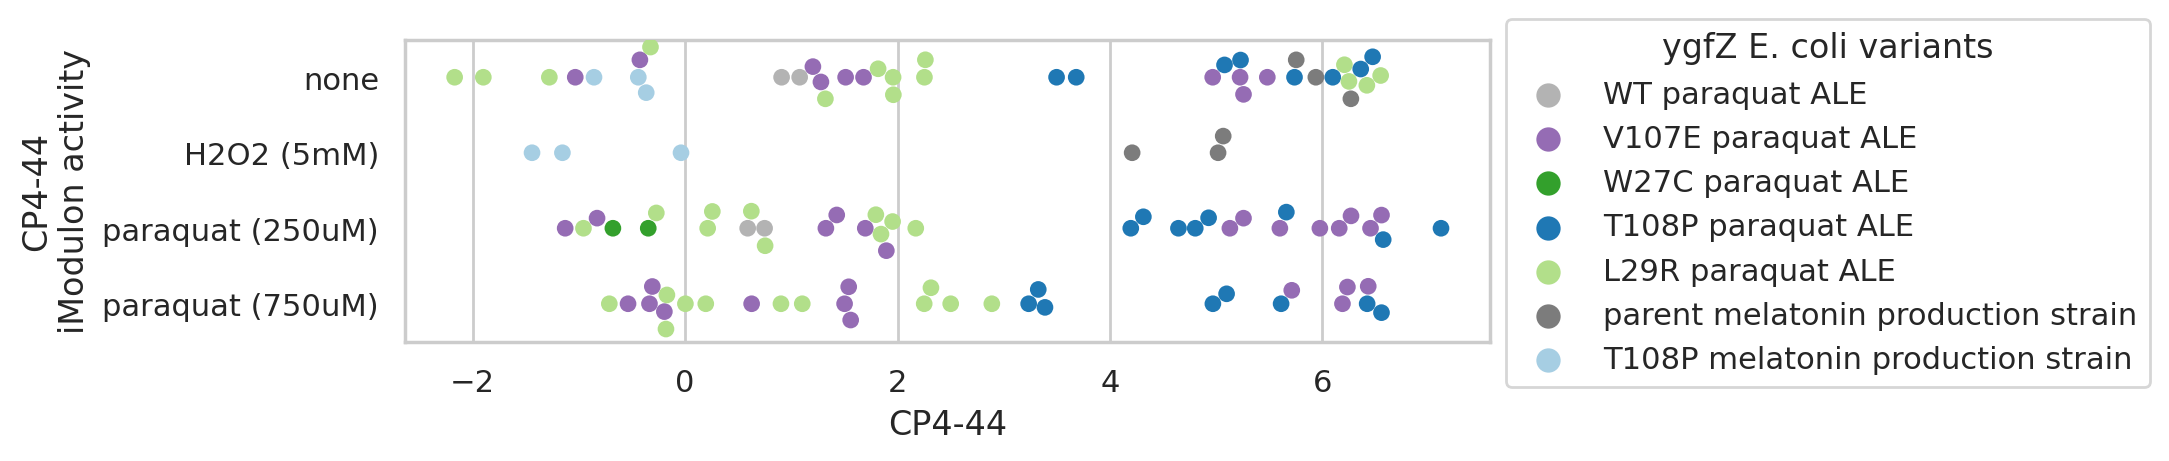

In [18]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(
    style="whitegrid",
    # palette="muted"
)

strain_clr_d = {
    'WT paraquat ALE': '#B3B3B3',
    'parent melatonin production strain': '#7C7C7C',
    'T108P paraquat ALE': "#1F78B4",
    'T108P melatonin production strain': '#A6CEE3',
    'V107E paraquat ALE': '#956CB4',
    'W27C paraquat ALE': '#33A02C',
    'L29R paraquat ALE': '#B2DF8A',
}

# Width of 4 is best for keeping dots from substantial overlap
figure(figsize=(7, 2), dpi=200)

# point size has to be less than 5, otherwise seaborn says that not all points can be placed.
ax = sns.swarmplot(
    data=ygfZ_proj_imod_act_df,
    y='Supplement', x="CP4-44", hue='strain',
    palette=strain_clr_d, size=6,
    order=[
        'none', 'H2O2 (5mM)', 'paraquat (250uM)', 'paraquat (750uM)'
    ]
)
ax.set(ylabel="CP4-44\niModulon activity")
lgnd = ax.legend(loc='lower left', bbox_to_anchor=(
    1, -0.2), title='ygfZ E. coli variants')


plt.savefig("f6d.svg")

In [19]:
ygfZ_proj_imod_act_df['strain'] = ygfZ_proj_imod_act_df['strain'].apply(lambda s: s.replace('paraquat ALE', '(paraquat ALE)'))
ygfZ_proj_imod_act_df['strain'] = ygfZ_proj_imod_act_df['strain'].apply(lambda s: s.replace('melatonin production strain', '(melatonin production strain)'))
ygfZ_proj_imod_act_df.strain.unique()

array(['WT (paraquat ALE)', 'V107E (paraquat ALE)', 'W27C (paraquat ALE)',
       'T108P (paraquat ALE)', 'L29R (paraquat ALE)',
       'parent (melatonin production strain)',
       'T108P (melatonin production strain)'], dtype=object)

In [20]:
none_cat_str = "none (control, " + str(len(ygfZ_proj_imod_act_df[ygfZ_proj_imod_act_df['Supplement']=="none"])) + ' samples)'
ygfZ_proj_imod_act_df['Supplement'] = ygfZ_proj_imod_act_df['Supplement'].apply(lambda s: none_cat_str if s == "none" else s)

h2o2_5mM_cat_str = "5mM H2O2 (" + str(len(ygfZ_proj_imod_act_df[ygfZ_proj_imod_act_df['Supplement']=="H2O2 (5mM)"])) + ' samples)'
ygfZ_proj_imod_act_df['Supplement'] = ygfZ_proj_imod_act_df['Supplement'].apply(lambda s: h2o2_5mM_cat_str if s == "H2O2 (5mM)" else s)

paraquat_250uM_cat_str = "250uM paraquat (" + str(len(ygfZ_proj_imod_act_df[ygfZ_proj_imod_act_df['Supplement']=="paraquat (250uM)"])) + ' samples)'
ygfZ_proj_imod_act_df['Supplement'] = ygfZ_proj_imod_act_df['Supplement'].apply(lambda s: paraquat_250uM_cat_str if s == "paraquat (250uM)" else s)

paraquat_750uM_cat_str = "750uM paraquat (" + str(len(ygfZ_proj_imod_act_df[ygfZ_proj_imod_act_df['Supplement']=="paraquat (750uM)"])) + ' samples)'
ygfZ_proj_imod_act_df['Supplement'] = ygfZ_proj_imod_act_df['Supplement'].apply(lambda s: paraquat_750uM_cat_str if s == "paraquat (750uM)" else s)

ygfZ_proj_imod_act_df.Supplement.unique()

array(['none (control, 40 samples)', '250uM paraquat (36 samples)',
       '750uM paraquat (31 samples)', '5mM H2O2 (6 samples)'],
      dtype=object)

In [21]:
samples_to_drop = ygfZ_proj_imod_act_df.index.tolist()

# Removing all samples in other categories
other_sample_imod_act_df = ica.A.loc[['CP4-44']].T
other_sample_imod_act_df.drop(samples_to_drop, inplace=True)
assert(len(set(samples_to_drop) & set(other_sample_imod_act_df.index.tolist())) == 0)
all_others_cat_name = 'all others iModulon samples (' + str(len(other_sample_imod_act_df)) + ')'
other_sample_imod_act_df["Supplement"] = all_others_cat_name
other_sample_imod_act_df.head()

,CP4-44,Supplement
p1k_00001,0.116495,all others iModulon samples (934)
p1k_00002,-0.116495,all others iModulon samples (934)
p1k_00003,4.096606,all others iModulon samples (934)
p1k_00004,3.695490,all others iModulon samples (934)
p1k_00005,4.678113,all others iModulon samples (934)


In [22]:
ygfZ_proj_imod_act_df['ygfZ mutation'] = ygfZ_proj_imod_act_df.apply(lambda r: 'none' if r.strain=='parent (melatonin production strain)' else r['ygfZ mutation'], axis=1)
ygfZ_proj_imod_act_df['ygfZ mutation'] = ygfZ_proj_imod_act_df.apply(lambda r: 'T108P (melatonin production strain)' if r.strain=='T108P (melatonin production strain)' else r['ygfZ mutation'], axis=1)
ygfZ_proj_imod_act_df[-20:]

,CP4-44,ygfZ mutation,Strain Description,Supplement,project,strain
p1k_00532,1.103556,L29R,paraquat ALE,750uM paraquat (31 samples),ros_tale,L29R (paraquat ALE)
p1k_00533,0.902935,L29R,paraquat ALE,750uM paraquat (31 samples),ros_tale,L29R (paraquat ALE)
p1k_00534,1.817466,L29R,paraquat ALE,"none (control, 40 samples)",ros_tale,L29R (paraquat ALE)
p1k_00535,1.321207,L29R,paraquat ALE,"none (control, 40 samples)",ros_tale,L29R (paraquat ALE)
p1k_00536,1.796157,L29R,paraquat ALE,250uM paraquat (36 samples),ros_tale,L29R (paraquat ALE)
p1k_00537,1.953888,L29R,paraquat ALE,250uM paraquat (36 samples),ros_tale,L29R (paraquat ALE)
p1k_00538,2.500731,L29R,paraquat ALE,750uM paraquat (31 samples),ros_tale,L29R (paraquat ALE)
p1k_00539,2.251297,L29R,paraquat ALE,750uM paraquat (31 samples),ros_tale,L29R (paraquat ALE)
SDT_ygfZ1,6.267613,none,NaN,"none (control, 40 samples)",NaN,parent (melatonin production strain)
SDT_ygfZ10,-1.154272,T108P (melatonin production strain),NaN,5mM H2O2 (6 samples),NaN,T108P (melatonin production strain)


[Text(0.5, 0, 'iModulon experiment')]

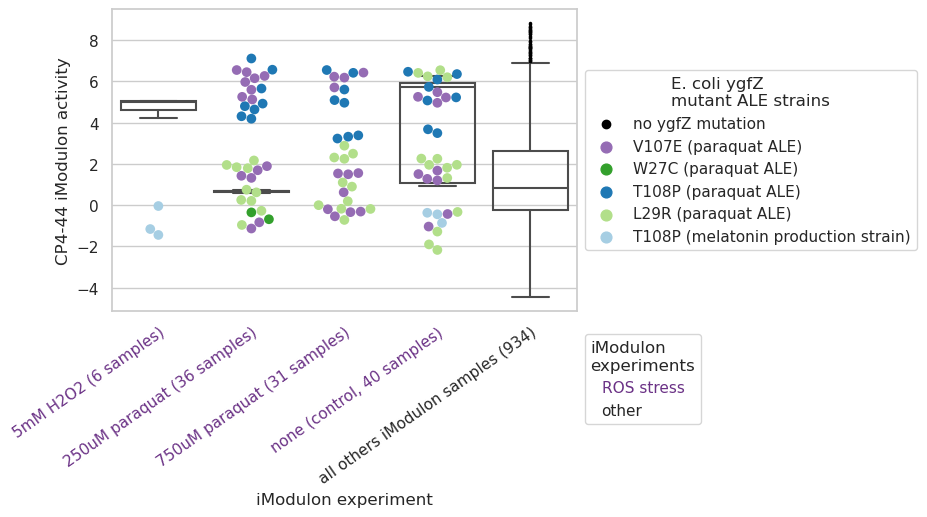

In [23]:
strain_clr_d = {
    'WT (paraquat ALE)': '#B3B3B3',
    'parent (melatonin production strain)': '#7C7C7C',
    'T108P (paraquat ALE)': "#1F78B4",
    'T108P (melatonin production strain)': '#A6CEE3',
    'V107E (paraquat ALE)': '#956CB4',
    'W27C (paraquat ALE)': '#33A02C',
    'L29R (paraquat ALE)': '#B2DF8A',
}

order_l = [h2o2_5mM_cat_str, paraquat_250uM_cat_str, paraquat_750uM_cat_str, none_cat_str, all_others_cat_name]

ros_stress_exp_labels = order_l.copy()
ros_stress_exp_labels.remove(all_others_cat_name)

plt.figure(figsize=(6, 4), dpi=100)

df = ygfZ_proj_imod_act_df[ygfZ_proj_imod_act_df['ygfZ mutation'] == 'none'].copy()
df = pd.concat([df, other_sample_imod_act_df])
ax = sns.boxplot(
    data=df,
    x="Supplement",
    y="CP4-44",
    boxprops={'facecolor': 'None'},
    zorder=1,
    order=order_l,
    flierprops=dict(marker='.', markeredgecolor='none',
                    markerfacecolor='black'),
)

# Create a dummy plot for the additional legend entry
plt.scatter([], [], color='black', label="no ygfZ mutation")

df = ygfZ_proj_imod_act_df[ygfZ_proj_imod_act_df['ygfZ mutation'] != 'none'].copy()
sns.swarmplot(
    ax=ax,
    data=df,
    x="Supplement", y="CP4-44", hue='strain',
    zorder=2, size=7,
    palette=strain_clr_d,
    order=order_l,
)


original_legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='E. coli ygfZ\nmutant ALE strains')

# Add dummy scatter plots for new legend entries with no markers
dummy_ros_stress = plt.scatter([], [], label="ROS stress", marker='None', color='purple')
dummy_other = plt.scatter([], [], label="other", marker='None')

# Create the second legend for "ROS stress" and "other"
legend2 = plt.legend(
    handles=[dummy_ros_stress, dummy_other],
    loc='center left',
    bbox_to_anchor=(1, -0.225),
    title='iModulon\nexperiments',
    handlelength=0,
    handletextpad=0,
    )

for text in legend2.get_texts():
    if text.get_text() == "ROS stress":
        text.set_color("#6B3286")

# Re-add the original legend to the plot
ax.add_artist(original_legend)

labels = plt.gca().get_xticklabels()
for label in labels:
    if label.get_text() in ros_stress_exp_labels:
        label.set_color('#6B3286')

plt.xticks(rotation=35, ha='right', rotation_mode="anchor")
ax.set(ylabel="CP4-44 iModulon activity")
ax.set(xlabel="iModulon experiment")
# plt.savefig("f6d.svg")


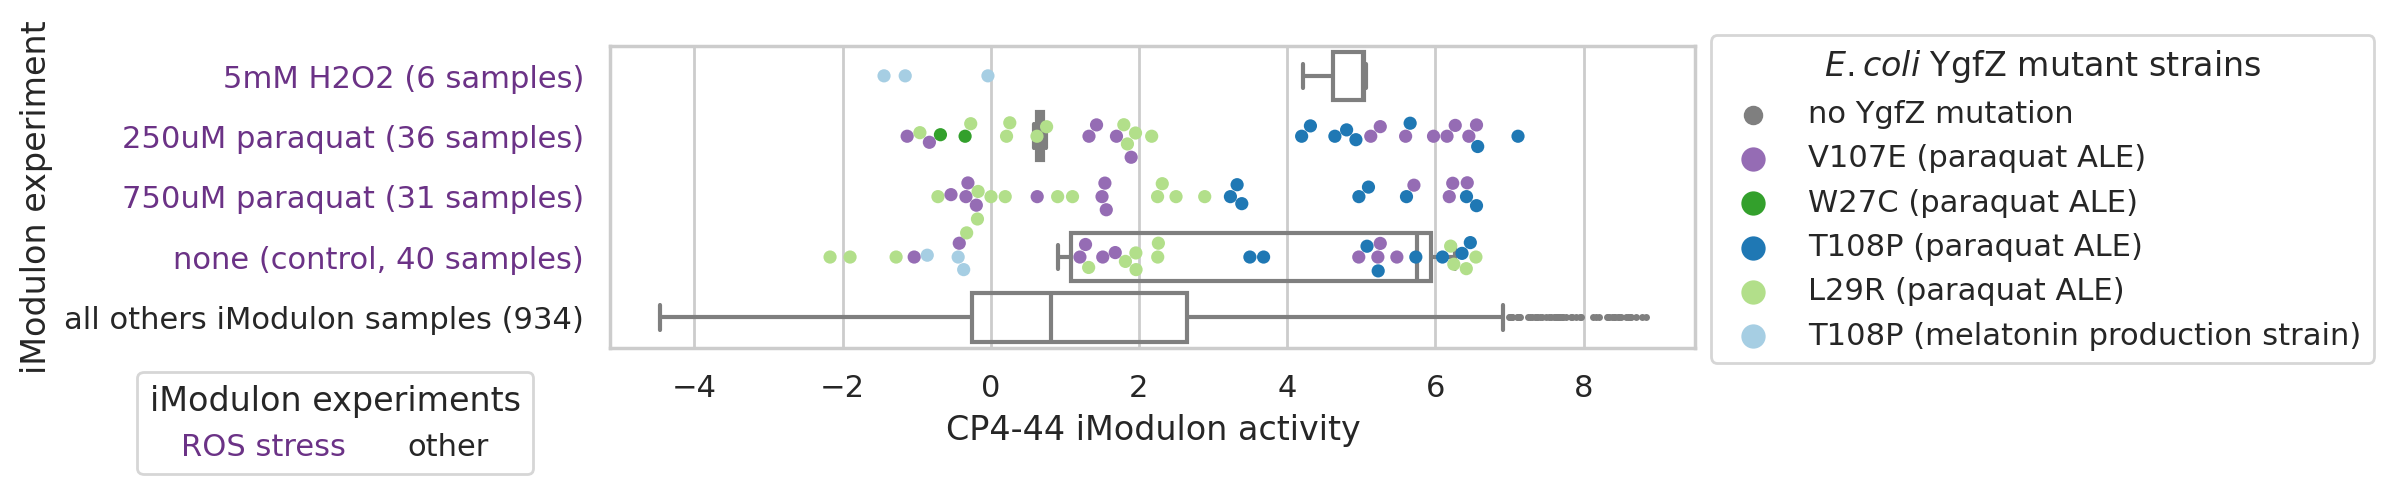

In [24]:
# Width of 4 is best for keeping dots from substantial overlap
figure(figsize=(7, 2), dpi=200)

df = ygfZ_proj_imod_act_df[ygfZ_proj_imod_act_df['ygfZ mutation'] == 'none'].copy()
df = pd.concat([df, other_sample_imod_act_df])
ax = sns.boxplot(
    data=df,
    x="CP4-44",
    y="Supplement",
    color='lightgrey',
    boxprops={'facecolor': 'None'},
    zorder=1,
    order=order_l,
    flierprops=dict(marker='.', markeredgecolor='none',
                    markerfacecolor='#7F7F7F'),
)

# Create a dummy plot for the additional legend entry
plt.scatter([], [], color='#7F7F7F', label="no YgfZ mutation")

df = ygfZ_proj_imod_act_df[ygfZ_proj_imod_act_df['ygfZ mutation'] != 'none'].copy()
sns.swarmplot(
    ax=ax,
    data=df,
    y="Supplement", x="CP4-44", hue='strain',
    zorder=2, size=4.75,
    palette=strain_clr_d,
    order=order_l,
)

original_legend = ax.legend(loc='lower left', bbox_to_anchor=(1, -0.1),
                            title='$\it{E. coli}$ YgfZ mutant strains'
                            )

# Add dummy scatter plots for new legend entries with no markers
dummy_ros_stress = plt.scatter([], [], label="ROS stress", marker='None', color='purple')
dummy_other = plt.scatter([], [], label="other", marker='None')

# Create the second legend for "ROS stress" and "other"
legend2 = plt.legend(
    handles=[dummy_ros_stress, dummy_other],
    ncol=2,
    loc='center left',
    bbox_to_anchor=(-0.45, -0.25),
    title='iModulon experiments',
    handlelength=0,
    handletextpad=0,
    )

for text in legend2.get_texts():
    if text.get_text() == "ROS stress":
        text.set_color("#6B3286")

# Re-add the original legend to the plot
ax.add_artist(original_legend)

labels = plt.gca().get_yticklabels()
for label in labels:
    if label.get_text() in ros_stress_exp_labels:
        label.set_color('#6B3286')

ax.set(xlabel="CP4-44 iModulon activity")
ax.set(ylabel="iModulon experiment")

plt.savefig("f6d.svg")